In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
import os
from copernicusmarine import login

CMDS_USERNAME = os.getenv("CMDS_USERNAME")
CMDS_PASSWORD = os.getenv("CMDS_PASSWORD")

if not CMDS_USERNAME or not CMDS_PASSWORD:
    raise ValueError("CMDS_USERNAME or CMDS_PASSWORD not set in .env")

# Authenticate with Copernicus Marine
login(username=CMDS_USERNAME, password=CMDS_PASSWORD)

/home/diana-bacircea/miniconda3/envs/opendrift/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


File /home/diana-bacircea/.copernicusmarine/.copernicusmarine-credentials already exists, overwrite it ? [y/N]:

ERROR - 2025-07-16T04:40:15Z - Abort
INFO - 2025-07-16T04:40:15Z - No configuration file have been modified.


False

In [3]:
import os

CMEMS_MIN_LON = float(os.getenv("CMEMS_MIN_LON"))
CMEMS_MIN_LAT = float(os.getenv("CMEMS_MIN_LAT"))
CMEMS_MAX_LON = float(os.getenv("CMEMS_MAX_LON"))
CMEMS_MAX_LAT = float(os.getenv("CMEMS_MAX_LAT"))

In [4]:
from copernicusmarine import subset
import os

def download_cmems_currents():
   

    # Time range
    date_start = "2024-12-01T00:00:00"
    date_end = "2025-01-31T23:00:00"

    # Product info
    dataset_id = "cmems_mod_glo_phy_anfc_0.083deg_PT1H-m"
    variables = ["uo", "vo"]

    # Output filename
    os.makedirs("data", exist_ok=True)
    output_file = "data/currents_dec_2024_jan_2025.nc"

    if os.path.exists(output_file):
        print(f"File {output_file} already exists. Skipping download.")
        return

    subset(
        dataset_id=dataset_id,
        variables=variables,
        minimum_longitude=CMEMS_MIN_LON,
        maximum_longitude=CMEMS_MAX_LON,
        minimum_latitude=CMEMS_MIN_LAT,
        maximum_latitude=CMEMS_MAX_LAT,
        start_datetime=date_start,
        end_datetime=date_end,
        output_filename=output_file,
    )

    print(f"Download complete: {output_file}")

In [5]:
download_cmems_currents()

INFO - 2025-07-16T04:40:16Z - Selected dataset version: "202406"
INFO - 2025-07-16T04:40:16Z - Selected dataset part: "default"
INFO - 2025-07-16T04:40:19Z - Starting download. Please wait...
100%|██████████| 618/618 [13:08<00:00,  1.28s/it]
INFO - 2025-07-16T04:53:27Z - Successfully downloaded to data/currents_dec_2024_jan_2025.nc


Download complete: data/currents_dec_2024_jan_2025.nc


In [6]:
from copernicusmarine import subset
import os

def download_cmems_winds():
    # Time range
    date_start = "2024-12-01T00:00:00"
    date_end = "2025-01-31T23:00:00"

    # Product info
    dataset_id = "cmems_obs-wind_glo_phy_my_l4_0.125deg_PT1H"


    # Output filename
    os.makedirs("data", exist_ok=True)
    output_file = f"data/winds_dec_2024_jan_2025.nc"

    if os.path.exists(output_file):
        print(f"File {output_file} already exists. Skipping download.")
        return

    subset(
        dataset_id=dataset_id,
        minimum_longitude=CMEMS_MIN_LON,
        maximum_longitude=CMEMS_MAX_LON,
        minimum_latitude=CMEMS_MIN_LAT,
        maximum_latitude=CMEMS_MAX_LAT,
        variables=["eastward_wind", "northward_wind"],
        start_datetime=date_start,
        end_datetime=date_end,
        output_filename=output_file,
    )

    print(f"Download complete: {output_file}")

In [7]:
download_cmems_winds()

INFO - 2025-07-16T04:53:30Z - Selected dataset version: "202211"
INFO - 2025-07-16T04:53:30Z - Selected dataset part: "default"
INFO - 2025-07-16T04:53:33Z - Starting download. Please wait...
100%|██████████| 3714/3714 [07:23<00:00,  8.37it/s]
INFO - 2025-07-16T05:00:57Z - Successfully downloaded to data/winds_dec_2024_jan_2025.nc


Download complete: data/winds_dec_2024_jan_2025.nc


In [8]:
from copernicusmarine import get

if os.path.exists("data/ice_dec_2024_jan_2025.nc"):
    print("File data/ice_dec_2024_jan_2025.nc already exists. Skipping download.")
else:
    get(
        dataset_id="osisaf_obs-si_glo_phy-sidrift_nrt_sh_P1D-m",
        request_file="ice_request.json"
    )

INFO - 2025-07-16T05:00:58Z - Selected dataset version: "202411"
INFO - 2025-07-16T05:00:58Z - Selected dataset part: "default"
INFO - 2025-07-16T05:00:58Z - Listing files on remote server...
1it [00:00,  2.12it/s]


In [9]:
import xarray as xr
import glob
import os

# Define the two directories
dirs = [
    "SEAICE_GLO_SEAICE_L4_NRT_OBSERVATIONS_011_001/osisaf_obs-si_glo_phy-sidrift_nrt_sh_P1D-m_202411/2024/12",
    "SEAICE_GLO_SEAICE_L4_NRT_OBSERVATIONS_011_001/osisaf_obs-si_glo_phy-sidrift_nrt_sh_P1D-m_202411/2025/01"
]
output_file = "data/ice_dec_2024_jan_2025.nc"

if os.path.exists(output_file):
    print(f"File {output_file} already exists. Skipping download.")
else:

    # Collect all .nc files
    nc_files = []
    for folder in dirs:
        nc_files.extend(sorted(glob.glob(os.path.join(folder, "*.nc"))))

    print(f"Found {len(nc_files)} NetCDF files")

    # Open and combine datasets
    ds = xr.open_mfdataset(nc_files, combine='by_coords')

    # Optional: trim time range if needed
    ds = ds.sel(time=slice("2024-12-01", "2025-01-31"))

    # Save combined dataset

    ds.to_netcdf(output_file)

    print(f"Saved combined dataset to {output_file}")


/tmp/ipykernel_1944053/1289969676.py:24: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_mfdataset(nc_files, combine='by_coords')
/tmp/ipykernel_1944053/1289969676.py:24: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 

Found 62 NetCDF files


/tmp/ipykernel_1944053/1289969676.py:24: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_mfdataset(nc_files, combine='by_coords')
/tmp/ipykernel_1944053/1289969676.py:24: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 

Saved combined dataset to data/ice_dec_2024_jan_2025.nc


In [10]:
import xarray as xr

# Open the NetCDF file
winds_dataset = xr.open_dataset(
    "data/winds_dec_2024_jan_2025.nc",
    drop_variables=[var for var in xr.open_dataset("data/winds_dec_2024_jan_2025.nc").data_vars 
                    if var not in ["eastward_wind", "northward_wind"]]
)

# Print the dataset summary, including variables
print(winds_dataset)

<xarray.Dataset> Size: 707MB
Dimensions:         (time: 1488, latitude: 64, longitude: 464)
Coordinates:
  * latitude        (latitude) float32 256B -77.94 -77.81 ... -70.19 -70.06
  * time            (time) datetime64[ns] 12kB 2024-12-01 ... 2025-01-31T23:0...
  * longitude       (longitude) float32 2kB 162.1 162.2 162.3 ... 219.8 219.9
Data variables:
    eastward_wind   (time, latitude, longitude) float64 354MB ...
    northward_wind  (time, latitude, longitude) float64 354MB ...
Attributes:
    title:                      Global Ocean - Wind and Stress - Hourly - Rep...
    history:                   N/A
    references:                Copernicus Marine Service Product User Manual ...
    Conventions:               CF-1.6, ACDD-1.3
    institution:               Royal Netherlands Meteorological Institute (KNMI)
    copernicusmarine_version:  2.1.3


In [16]:
import os
import numpy as np
from datetime import datetime
from opendrift.readers import reader_netCDF_CF_generic, reader_global_landmask
from opendrift.models.oceandrift import OceanDrift

SPILL_POINT_LON = float(os.getenv("SPILL_POINT_LON"))
SPILL_POINT_LAT = float(os.getenv("SPILL_POINT_LAT"))

PARTICLES_NUMBER = int(os.getenv("PARTICLES_NUMBER"))

print(f"Spill point: ({SPILL_POINT_LAT}, {SPILL_POINT_LON})")
print(f"Number of particles: {PARTICLES_NUMBER}")


# Load Copernicus data
reader_currents = reader_netCDF_CF_generic.Reader('data/currents_dec_2024_jan_2025.nc')
reader_winds = reader_netCDF_CF_generic.Reader('data/winds_dec_2024_jan_2025.nc')
reader_ice = reader_netCDF_CF_generic.Reader('data/ice_dec_2024_jan_2025.nc')


# Initialize model
o = OceanDrift(loglevel=20)
o.add_reader([reader_currents, reader_winds, reader_ice, reader_global_landmask.Reader()])

# --- Model Configuration (Nurdle-Like Behavior) ---
o.set_config('general:coastline_action', 'stranding')  # beaching


radius_lat = 0.045  
radius_lon = 0.174

seed_lons = np.random.normal(loc=SPILL_POINT_LON, scale=radius_lon, size=PARTICLES_NUMBER)
seed_lats = np.random.normal(loc=SPILL_POINT_LAT, scale=radius_lat, size=PARTICLES_NUMBER)

# Seed particles
o.seed_elements(
    lon=seed_lons,
    lat=seed_lats,
    time=datetime(2024, 12, 1),
)

# Run simulation through January 2025
o.run(
    end_time=datetime(2025, 1, 31),
    time_step=3600,
    time_step_output=86400
)


05:24:05 INFO    opendrift.readers:61: Opening file with xr.open_dataset
05:24:05 INFO    opendrift.readers.reader_netCDF_CF_generic:299: Grid coordinates are detected, but proj4 string not given: assuming latlong
05:24:05 INFO    opendrift.readers.reader_netCDF_CF_generic:332: Detected dimensions: {'z': 'depth', 'y': 'latitude', 'time': 'time', 'x': 'longitude'}
05:24:05 INFO    opendrift.readers.basereader:176: Variable x_sea_water_velocity will be rotated from eastward_sea_water_velocity
05:24:05 INFO    opendrift.readers.basereader:176: Variable y_sea_water_velocity will be rotated from northward_sea_water_velocity
05:24:05 INFO    opendrift.readers:61: Opening file with xr.open_dataset
05:24:05 INFO    opendrift.readers.reader_netCDF_CF_generic:299: Grid coordinates are detected, but proj4 string not given: assuming latlong
05:24:05 INFO    opendrift.readers.reader_netCDF_CF_generic:332: Detected dimensions: {'y': 'latitude', 'time': 'time', 'x': 'longitude'}
05:24:05 INFO    open

Spill point: (-74.78, -171.21)
Number of particles: 10000


05:24:05 INFO    opendrift:2015: 2024-12-01 01:00:00 - step 2 of 1464 - 10000 active elements (0 deactivated)
05:24:05 INFO    opendrift:2015: 2024-12-01 02:00:00 - step 3 of 1464 - 10000 active elements (0 deactivated)
05:24:05 INFO    opendrift:2015: 2024-12-01 03:00:00 - step 4 of 1464 - 10000 active elements (0 deactivated)
05:24:05 INFO    opendrift:2015: 2024-12-01 04:00:00 - step 5 of 1464 - 10000 active elements (0 deactivated)
05:24:05 INFO    opendrift:2015: 2024-12-01 05:00:00 - step 6 of 1464 - 10000 active elements (0 deactivated)
05:24:05 INFO    opendrift:2015: 2024-12-01 06:00:00 - step 7 of 1464 - 10000 active elements (0 deactivated)
05:24:05 INFO    opendrift:2015: 2024-12-01 07:00:00 - step 8 of 1464 - 10000 active elements (0 deactivated)
05:24:05 INFO    opendrift:2015: 2024-12-01 08:00:00 - step 9 of 1464 - 10000 active elements (0 deactivated)
05:24:05 INFO    opendrift:2015: 2024-12-01 09:00:00 - step 10 of 1464 - 10000 active elements (0 deactivated)
05:24:05 

<xarray.Dataset> Size: 52MB
Dimensions:                                   (trajectory: 10000, time: 62)
Coordinates:
  * trajectory                                (trajectory) int64 80kB 0 ... 9999
  * time                                      (time) datetime64[ns] 496B 2024...
Data variables: (12/21)
    status                                    (trajectory, time) float32 2MB ...
    moving                                    (trajectory, time) float32 2MB ...
    age_seconds                               (trajectory, time) float32 2MB ...
    origin_marker                             (trajectory, time) float32 2MB ...
    lon                                       (trajectory, time) float32 2MB ...
    lat                                       (trajectory, time) float32 2MB ...
    ...                                        ...
    upward_sea_water_velocity                 (trajectory, time) float32 2MB ...
    sea_surface_wave_significant_height       (trajectory, time) float32 2MB ...
    sea_surface_wave_stokes_drift_x_velocity  (trajectory, time) float32 2MB ...
    sea_surface_wave_stokes_drift_y_velocity  (trajectory, time) float32 2MB ...
    sea_floor_depth_below_sea_level           (trajectory, time) float32 2MB ...
    land_binary_mask                          (trajectory, time) float32 2MB ...
Attributes: (12/117)
    Conventions:                                                           CF...
    standard_name_vocabulary:                                              CF...
    featureType:                                                           tr...
    title:                                                                 Op...
    summary:                                                               Ou...
    keywords:                                                              tr...
    ...                                                                    ...
    geospatial_lon_units:                                                  de...
    geospatial_lon_resolution:                                             point
    runtime:                                                               0:...
    geospatial_vertical_min:                                               0.0
    geospatial_vertical_max:                                               0.0
    geospatial_vertical_positive:                                          up

In [12]:
print(o)

--------------------
Reader performance:
--------------------
data/currents_dec_2024_jan_2025.nc
 0:00:02.8  total
 0:00:00.1  preparing
 0:00:02.6  reading
 0:00:00.9  interpolation
 0:00:00.0  interpolation_time
 0:00:00.0  masking
--------------------
global_landmask
 0:00:00.7  total
 0:00:00.0  preparing
 0:00:00.6  reading
 0:00:00.0  masking
--------------------
Performance:
   18.5 total time
    2.1 configuration
    0.0 preparing main loop
      0.0 moving elements to ocean
   16.3 main loop
      3.8 updating elements
    0.0 cleaning up
--------------------
Model:	OceanDrift     (OpenDrift version 1.14.2)
	10000 active Lagrangian3DArray particles  (0 deactivated, 0 scheduled)
-------------------
Environment variables:
  -----
  x_sea_water_velocity
  y_sea_water_velocity
     1) data/currents_dec_2024_jan_2025.nc
  -----
  land_binary_mask
     1) global_landmask
  -----
Readers not added for the following variables:
  sea_floor_depth_below_sea_level
  sea_surface_height
  

05:24:57 INFO    opendrift:3667: Time to make plot: 0:00:22.955226


(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2024-12-01 00:00 to 2025-01-31 00:00 UTC (62 steps)'}>,
 <Figure size 912.686x1100 with 1 Axes>)

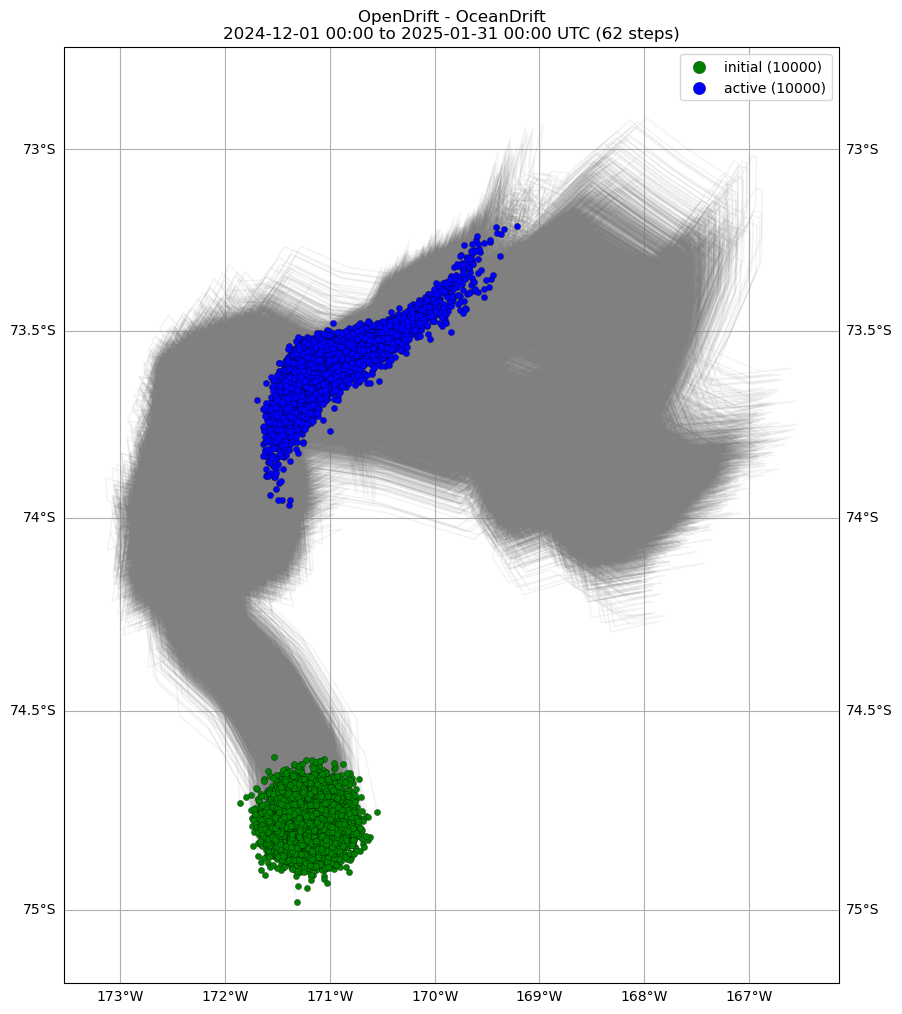

In [17]:
from datetime import datetime

# Get current system time
now = datetime.now()
timestamp_str = now.strftime("%Y%m%d_%H%M%S")

os.makedirs("simulations", exist_ok=True)

# Use it in the filename
o.plot(
    fast=False,
    legend=True,
    filename=f"simulations/nurdle_spill_{timestamp_str}.png",
    show_grid=True,
    lonlat_grid=True,
    grid_labels=True,
    coastline=True
)

In [18]:
# New OpenDrift-compatible way
final_lons = o.result.lon[-1]
final_lats = o.result.lat[-1]

# Bounding box
min_lon = np.min(final_lons)
max_lon = np.max(final_lons)
min_lat = np.min(final_lats)
max_lat = np.max(final_lats)

print("Bounding box of active particles (final positions):")
print(f"Longitude: {min_lon:.4f} to {max_lon:.4f}")
print(f"Latitude:  {min_lat:.4f} to {max_lat:.4f}")


Bounding box of active particles (final positions):
Longitude: -172.4538 to -167.4393
Latitude:  -74.7947 to -73.2662


In [19]:
from datetime import datetime

# Get current system time
now = datetime.now()
timestamp_str = now.strftime("%Y%m%d_%H%M%S")

os.makedirs("simulations", exist_ok=True)

o.animation(
    filename=f"simulations/nurdle_dispersion_dec_2024_jan_2025_{timestamp_str}.mp4",
    show_elements=True,
    show_trajectory=True,
    marker_size=2,
    dpi=150,
    fast=True,
    show_grid=True,
    lonlat_grid=True,
    grid_labels=True,
    grid_minor=True,
    linewidth=0.5
)

05:26:07 WARNING opendrift:2371: Plotting fast. This will make your plots less accurate.
05:26:08 INFO    opendrift:4533: Saving animation to simulations/nurdle_dispersion_dec_2024_jan_2025_20250716_082607.mp4...
05:26:25 INFO    opendrift:2974: Time to make animation: 0:00:17.636617
